# Simulation Playground Notebook
This notebook is designed as a easy einterface to call the functions that we have defined

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np

import torch.optim as optim
import torch.nn as nn
import torch

from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns

from data_loader import load_participants_info, load_event_descriptions, load_behavioral_data, preprocess_data

# Data Preparation
Let's prepare some data first to fit our model. We are specifically using ["Locus coeruleus activity strengthens prioritized memories under arousal"](https://openneuro.org/datasets/ds002011/versions/1.0.0) dataset fror now.

In [2]:
DATASET_PATH = "data"
participants_df = load_participants_info(DATASET_PATH)
load_event_descriptions(DATASET_PATH)

df_behavior = load_behavioral_data(DATASET_PATH, "01")
for idx in range(2,11):
    sample_participant = f"0{idx}"
    df = load_behavioral_data(DATASET_PATH, sample_participant)
    df_behavior = pd.concat([df, df_behavior], ignore_index=True)

Let's preprocess our data first

In [3]:
X, Y, X_tensor, Y_tensor, scaler_X, scaler_Y, df_clean = preprocess_data(df_behavior)

X Shape: torch.Size([1699, 7]), Y Shape: torch.Size([1699])
Y Min: -1.0, Y Max: 1.0


In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X_tensor, Y_tensor, test_size=0.2, random_state=42)

# Training

In [5]:
from train import (train_feed_forward_nn,
                   train_vanilla_rnn,
                   train_vanilla_lstm,
                   train_vanilla_lc_model,
                   train_lstm_lc_model,
                   train_lstm_controller,
                   train_ff_controller
                   )
from analysis.evaluation import evaluate_model

## Fully Connected Neural Network

To illustrate our idea, we want to train 2 models from math and computer science, which is our vanilla feed forward networks and an recurrent networks.

Epoch 0, Loss: 0.08448837697505951
Epoch 100, Loss: 0.04724692180752754
Epoch 200, Loss: 0.0450790636241436
Epoch 300, Loss: 0.04333193600177765
Epoch 400, Loss: 0.042162273079156876
Epoch 500, Loss: 0.041411373764276505
Epoch 600, Loss: 0.03970930725336075
Epoch 700, Loss: 0.03906899690628052
Epoch 800, Loss: 0.03831147775053978
Epoch 900, Loss: 0.03741944208741188
Epoch 1000, Loss: 0.0363762341439724
Epoch 1100, Loss: 0.035817600786685944
Epoch 1200, Loss: 0.03541610762476921
Epoch 1300, Loss: 0.03542915731668472
Epoch 1400, Loss: 0.03577340394258499
Epoch 1500, Loss: 0.03493223711848259
Epoch 1600, Loss: 0.035178493708372116
Epoch 1700, Loss: 0.034900959581136703
Epoch 1800, Loss: 0.03369874507188797
Epoch 1900, Loss: 0.03416295722126961
Training complete!
Evaluating Model: FeedForwardNN


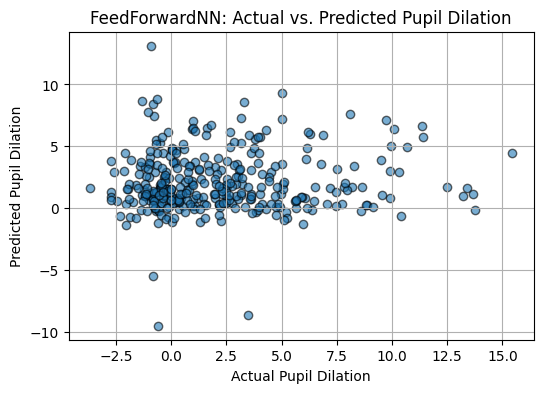

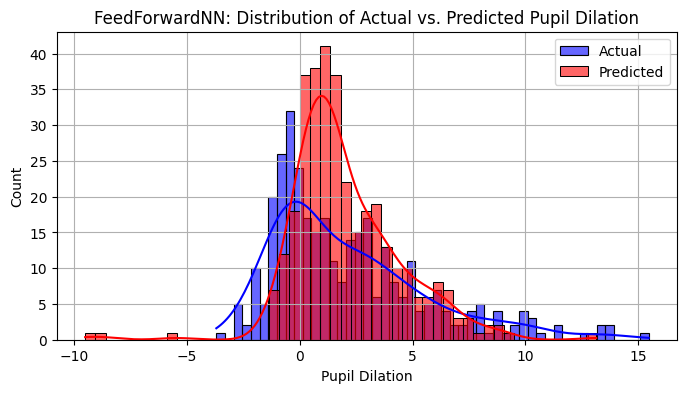

FeedForwardNN - Pearson Correlation: 0.0591


In [6]:
model_ff = train_feed_forward_nn(X_train, Y_train,epochs=2000)
evaluate_model(model_ff, X_test, Y_test, df_clean, scaler_Y=scaler_Y)

## Recurent Neural Networks

We will  do the same thing with an recurrent neural network

In [7]:
# model_rnn = train_vanilla_rnn(X_train, Y_train, epochs=2000)
# evaluate_model(model_rnn, X_test, Y_test, df_clean, scaler_Y=scaler_Y)

## LSTM Models

In [8]:
# model_lstm = train_vanilla_lstm(X_train, Y_train, epochs=5000, hidden_dim=12)
# evaluate_model(model_lstm, X_test, Y_test, df_clean, scaler_Y=scaler_Y)

## LCNECortex Fitter Model

Now coming to our customized LCNECortex model

Epoch 0, Loss: 0.7409043908119202


/Users/kevinb/miniforge3/envs/cse251b/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 100, Loss: 0.10811680555343628
Epoch 200, Loss: 0.07987776398658752
Epoch 300, Loss: 0.09433308243751526
Epoch 400, Loss: 0.08367234468460083
Epoch 500, Loss: 0.10789971798658371
Epoch 600, Loss: 0.11698516458272934
Epoch 700, Loss: 0.07856932282447815
Epoch 800, Loss: 0.07948519289493561
Epoch 900, Loss: 0.10224099457263947
Epoch 1000, Loss: 0.04890648275613785
Epoch 1100, Loss: 0.06368663161993027
Epoch 1200, Loss: 0.09448564052581787
Epoch 1300, Loss: 0.06452436000108719
Epoch 1400, Loss: 0.06315644085407257
Epoch 1500, Loss: 0.0958055779337883
Epoch 1600, Loss: 0.14694583415985107
Epoch 1700, Loss: 0.0809074342250824
Epoch 1800, Loss: 0.09038908034563065
Epoch 1900, Loss: 0.0644165426492691
Training complete!
Evaluating Model: LCNECortexFitter


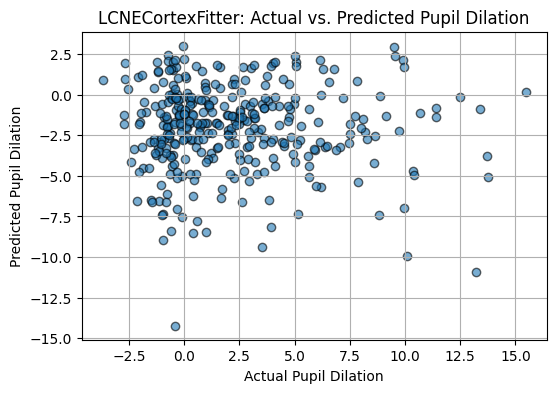

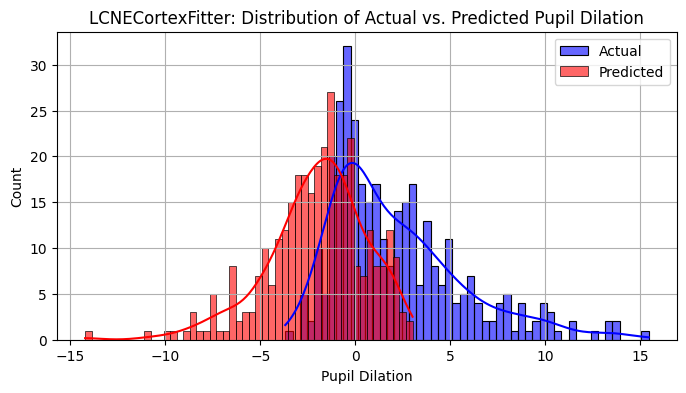

LCNECortexFitter - Pearson Correlation: -0.0263


In [9]:
model_lc_vanilla = train_vanilla_lc_model(X_train, Y_train, epochs=2000)
evaluate_model(model_lc_vanilla, X_test, Y_test, df_clean, scaler_Y=scaler_Y)

## LSTM LCNECortex Model

In [10]:
# model_lc_lstm = train_lstm_lc_model(X_train, Y_train, epochs=2000, hidden_dim=64)
# evaluate_model(model_lc_lstm, X_test, Y_test, df_clean, scaler_Y=scaler_Y)

## LSTM Gadget Model

In [11]:
# lstm_gadget = train_lstm_controller(X_train, Y_train, epochs=2000, hidden_dim=64)
# evaluate_model(lstm_gadget, X_test, Y_test, df_clean, scaler_Y=scaler_Y)

# FF Gadget Model

Epoch 0, Loss: 0.07663317024707794
Epoch 100, Loss: 0.025631140917539597
Epoch 200, Loss: 0.01832173578441143
Epoch 300, Loss: 0.03149701654911041
Epoch 400, Loss: 0.03211521729826927
Epoch 500, Loss: 0.019138548523187637
Epoch 600, Loss: 0.01937437430024147
Epoch 700, Loss: 0.024437088519334793
Epoch 800, Loss: 0.02410675585269928
Epoch 900, Loss: 0.030915722250938416
Epoch 1000, Loss: 0.015871964395046234
Epoch 1100, Loss: 0.029289206489920616
Epoch 1200, Loss: 0.017941789701581
Epoch 1300, Loss: 0.017144842073321342
Epoch 1400, Loss: 0.020636865869164467
Epoch 1500, Loss: 0.010323788970708847
Epoch 1600, Loss: 0.0147329643368721
Epoch 1700, Loss: 0.01740088127553463
Epoch 1800, Loss: 0.023269739001989365
Epoch 1900, Loss: 0.019466616213321686
Epoch 2000, Loss: 0.02623722143471241
Epoch 2100, Loss: 0.024480607360601425
Epoch 2200, Loss: 0.04368637129664421
Epoch 2300, Loss: 0.0326981395483017
Epoch 2400, Loss: 0.02152412012219429
Epoch 2500, Loss: 0.025332162156701088
Epoch 2600, Los

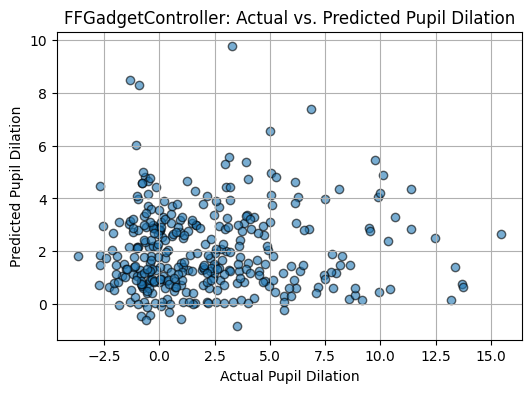

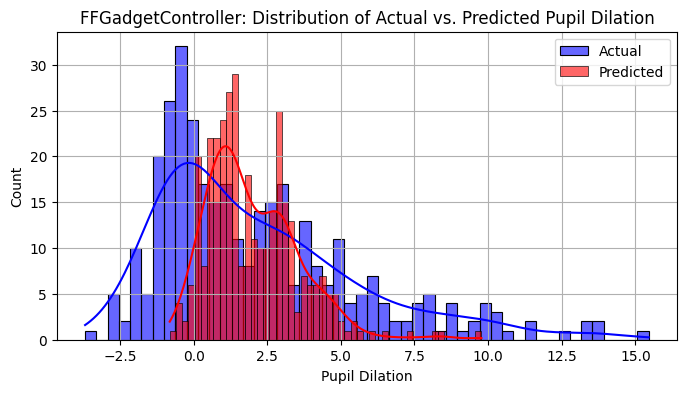

FFGadgetController - Pearson Correlation: 0.0419


In [12]:
ff_gadget = train_ff_controller(X_train, Y_train, epochs=5000, hidden_dim=200)
evaluate_model(ff_gadget, X_test, Y_test, df_clean, scaler_Y=scaler_Y)

Interesting results

# Analysis

In [13]:
from analysis.analysis import (pca_lcne_lstm,
                               pca_feed_forward,
                               pca_lcne,
                               pca_lstm,
                               pca_lstm_gadget,
                               pca_ff_gadget,
                               analyze_ff_gadget_activations,
)

## Feed-Forward Neural Networks

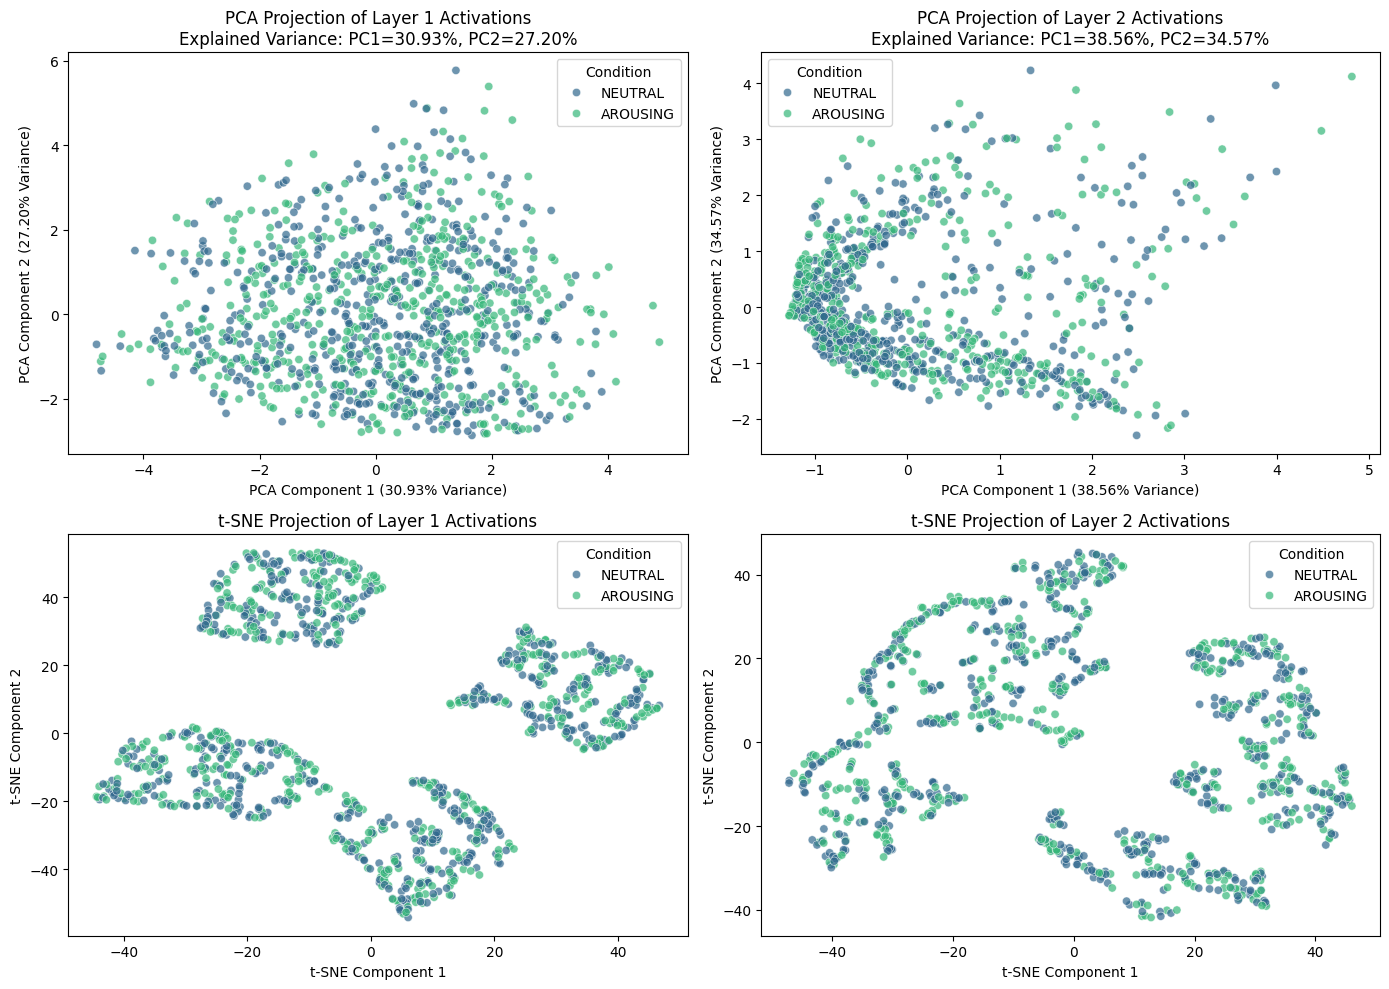

In [14]:
pca_feed_forward(model_ff, X_tensor, df_behavior)

## LCNECortex Model

We will see that, though  under fitted with the real data, there are some structureness to the data that we can play around with since we injected mechanistic insights into it.

Text(0.5, 1.0, 'Cortex Activation Distribution')

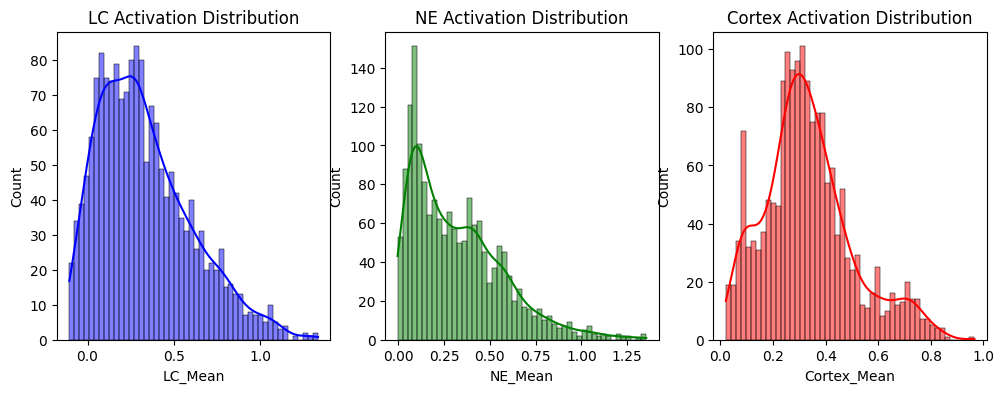

In [15]:
with torch.no_grad():
    prev_LC = torch.zeros(X_tensor.shape[0], model_lc_vanilla.hidden_dim)
    prev_Cortex = torch.zeros(X_tensor.shape[0], model_lc_vanilla.hidden_dim)

    LC_act, NE_act, C_act, Pupil_pred, LC_raw, NE_raw, C_raw = model_lc_vanilla(X_tensor, prev_LC, prev_Cortex, return_activations=True)

act_lc = LC_act.cpu().numpy()
act_ne = NE_act.cpu().numpy()
act_cortex = C_act.cpu().numpy()

df_activations = pd.DataFrame({
    'LC_Mean': act_lc.mean(axis=1),
    'NE_Mean': act_ne.mean(axis=1),
    'Cortex_Mean': act_cortex.mean(axis=1),
    'PupilPred': Pupil_pred.cpu().numpy().squeeze(),
    'ActualPupil': df_clean['Event_PupilDilation'].values  # Ensure this aligns with X_tensor
})

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.histplot(df_activations['LC_Mean'], kde=True, bins=50, color='blue')
plt.title("LC Activation Distribution")

plt.subplot(1, 3, 2)
sns.histplot(df_activations['NE_Mean'], kde=True, bins=50, color='green')
plt.title("NE Activation Distribution")

plt.subplot(1, 3, 3)
sns.histplot(df_activations['Cortex_Mean'], kde=True, bins=50, color='red')
plt.title("Cortex Activation Distribution")

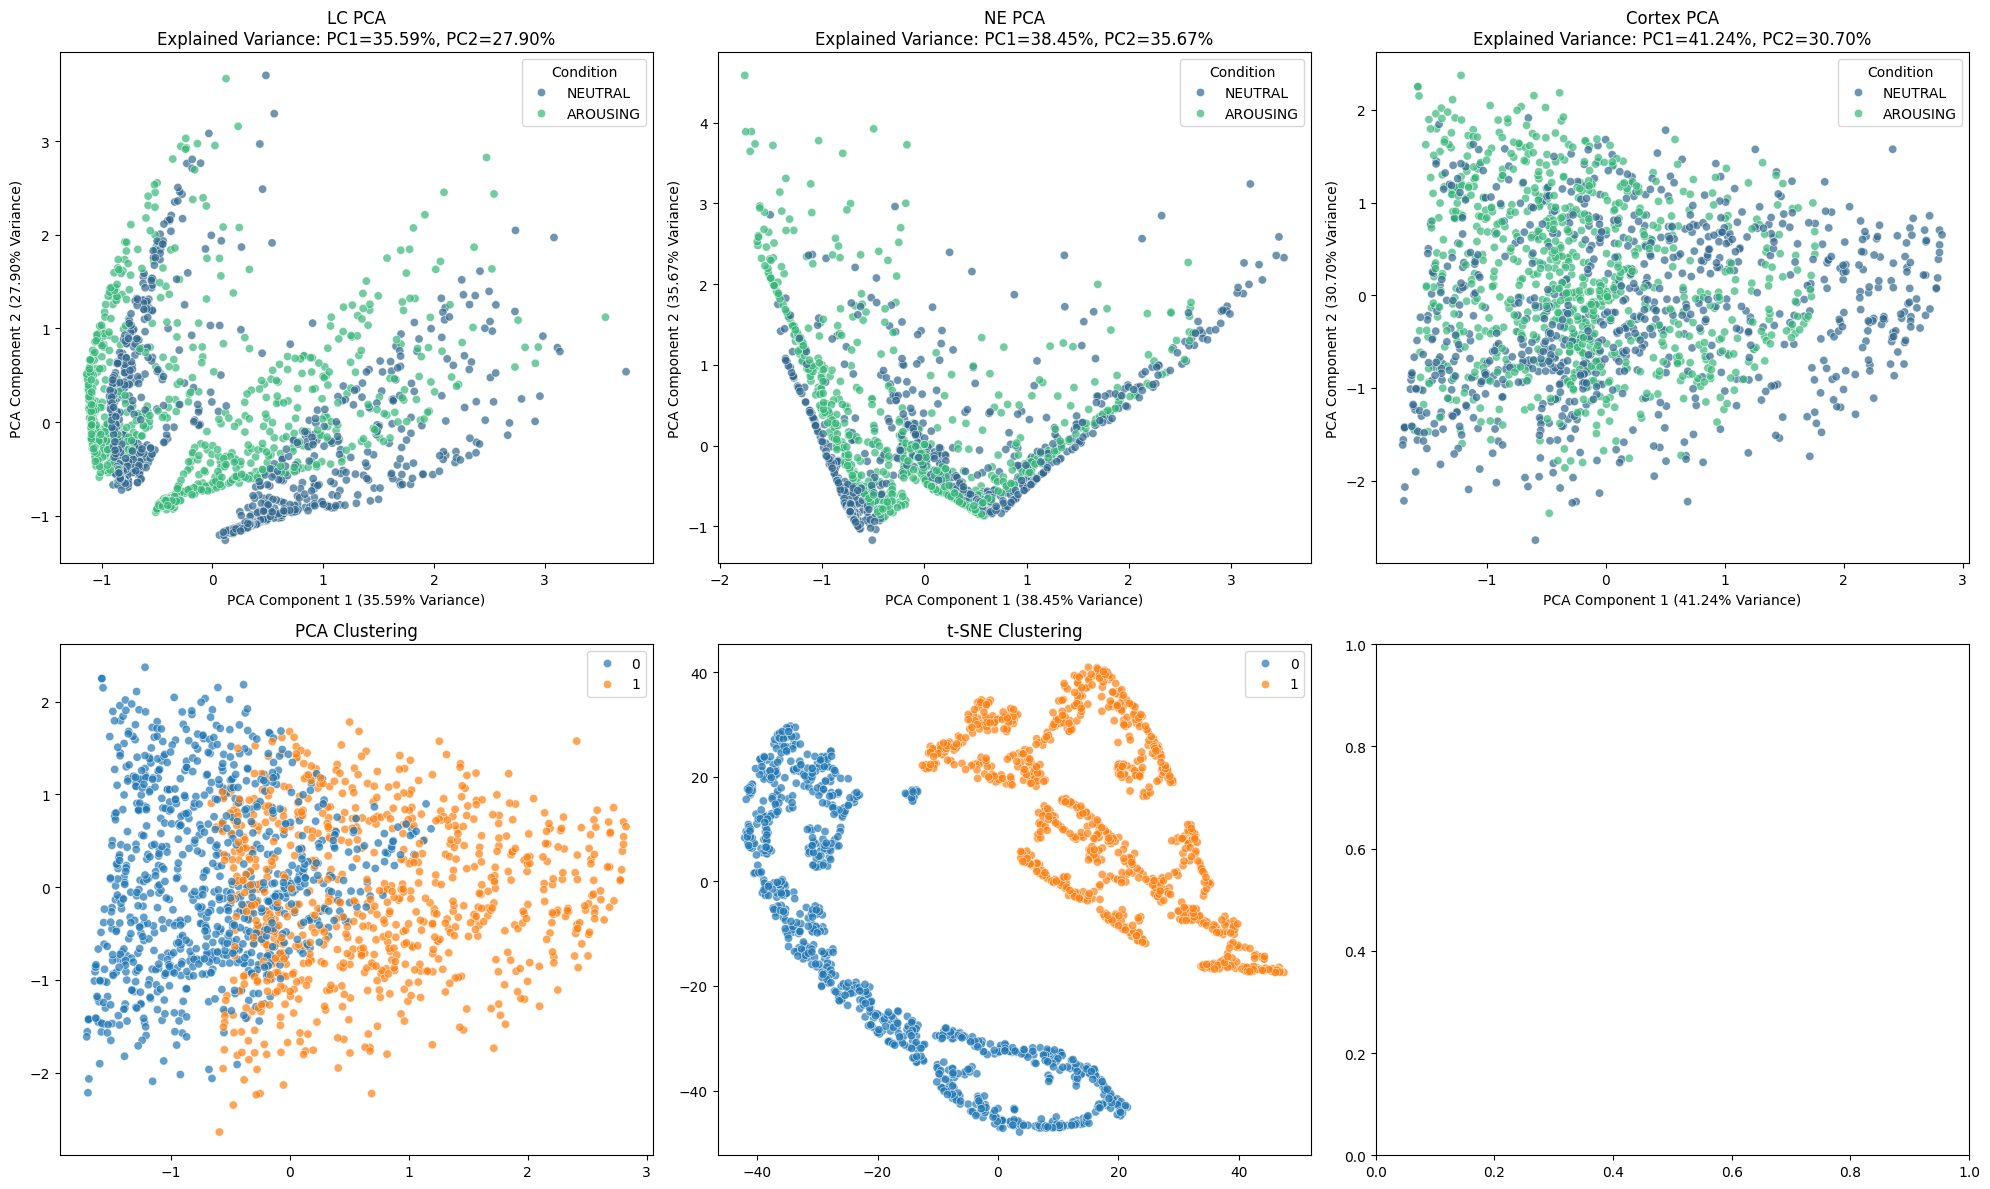

In [16]:
pca_lcne(model_lc_vanilla, X_tensor, df_clean)

## LSTM LCNECortex Model

In [17]:
# pca_lcne_lstm(model_lc_lstm, X_tensor, df_clean)

## LSTM Gadget Analysis

In [18]:
# pca_lstm_gadget(lstm_gadget, X_tensor, df_clean)

## Vanilla LSTM Comparison

In [19]:
# pca_lstm(model_lstm, X_test, df_clean)

## FF Gadget Model

In [20]:
# pca_ff_gadget(ff_gadget, X_test, df_clean)

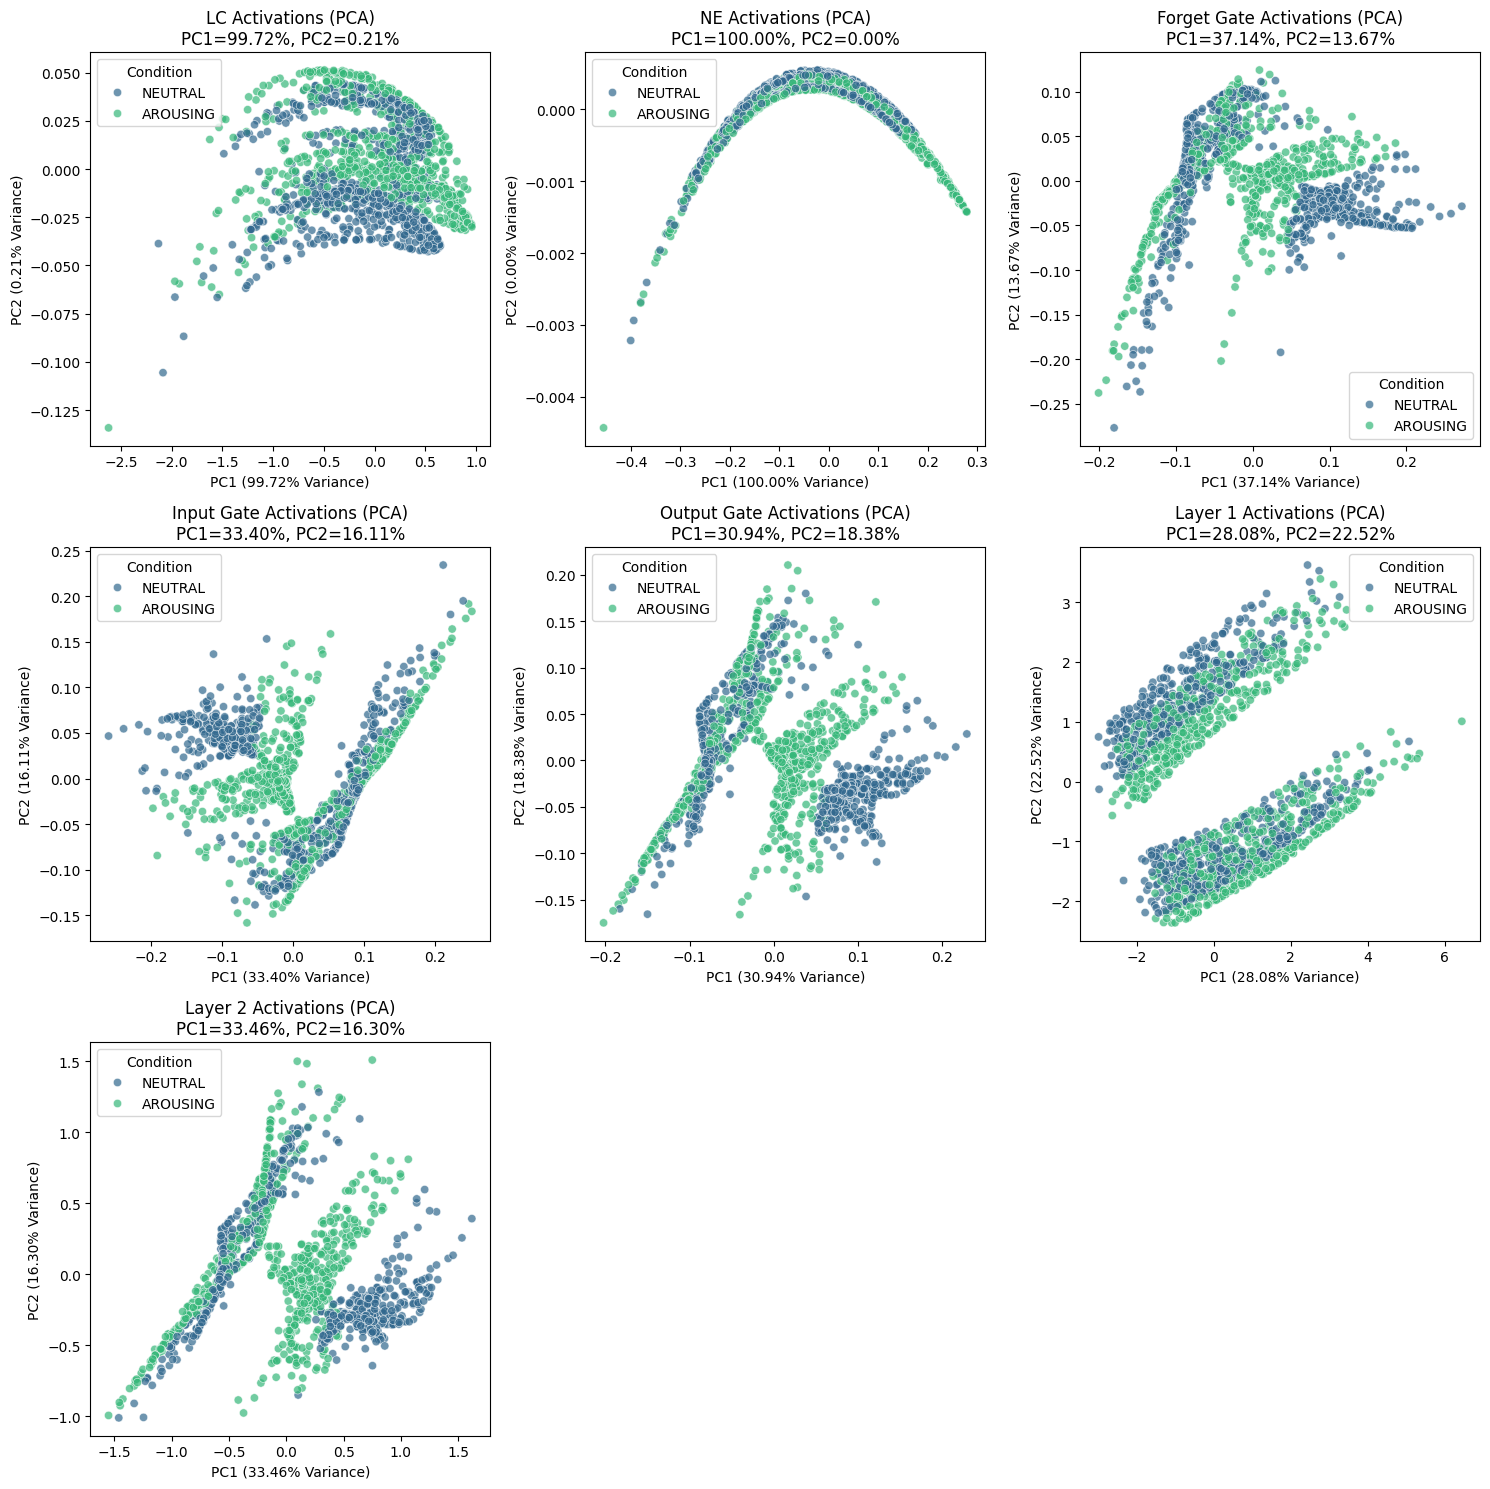


 Pearson Correlation with Actual Pupil Dilation:
LC: 0.050
NE: -0.059
Forget Gate: 0.232
Input Gate: 0.466
Output Gate: 0.154
Layer 1: -0.163
Layer 2: 0.092
Predicted Pupil Dilation: 0.532


In [21]:
analyze_ff_gadget_activations(ff_gadget, X_tensor, df_clean)